In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(precision=3)
#import pylab as pl
import pprint

## 1. Data Loading

In [170]:
Data = pd.DataFrame(columns=['CaloryIntake','Breakfast','FatBurner','IntermittentFasting','Exercise','BodyType'])
#Creating Data of body type with different attributes.

In [171]:
Data.loc[0] = [1300,0,0,0,2,'skinny']
Data.loc[1] = [3000,1,1,1,1,'Normal']
Data.loc[2] = [3900,2,0,0,0,'Fat']
Data.loc[3] = [1500,0,0,1,2,'skinny']
Data.loc[4] = [5000,2,0,0,2,'Fat']
Data.loc[5] = [1600,1,1,0,1,'skinny']
Data.loc[6] = [2000,1,0,0,2,'Normal']
Data.loc[7] = [5000,0,0,1,0,'Fat']
Data.loc[8] = [2700,1,1,0,2,'Normal']
Data.loc[9] = [4000,1,2,1,0,'Fat']

Data.head(10)

,CaloryIntake,Breakfast,FatBurner,IntermittentFasting,Exercise,BodyType
0,1300,0,0,0,2,skinny
1,3000,1,1,1,1,Normal
2,3900,2,0,0,0,Fat
3,1500,0,0,1,2,skinny
4,5000,2,0,0,2,Fat
5,1600,1,1,0,1,skinny
6,2000,1,0,0,2,Normal
7,5000,0,0,1,0,Fat
8,2700,1,1,0,2,Normal
9,4000,1,2,1,0,Fat


## 2. Splitting features and labels

In [172]:
x = Data[['CaloryIntake','Breakfast','FatBurner','IntermittentFasting','Exercise']]
x.head(10)

,CaloryIntake,Breakfast,FatBurner,IntermittentFasting,Exercise
0,1300,0,0,0,2
1,3000,1,1,1,1
2,3900,2,0,0,0
3,1500,0,0,1,2
4,5000,2,0,0,2
5,1600,1,1,0,1
6,2000,1,0,0,2
7,5000,0,0,1,0
8,2700,1,1,0,2
9,4000,1,2,1,0


In [173]:
y = pd.factorize(Data.BodyType)[0]
y

array([0, 1, 2, 0, 2, 0, 1, 2, 1, 2], dtype=int64)

## 3. Standardizing 

In [174]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
x_std

array([[-1.267, -1.286, -0.745, -0.816,  0.918],
       [ 0.   ,  0.143,  0.745,  1.225, -0.229],
       [ 0.671,  1.571, -0.745, -0.816, -1.376],
       [-1.118, -1.286, -0.745,  1.225,  0.918],
       [ 1.491,  1.571, -0.745, -0.816,  0.918],
       [-1.043,  0.143,  0.745, -0.816, -0.229],
       [-0.745,  0.143, -0.745, -0.816,  0.918],
       [ 1.491, -1.286, -0.745,  1.225, -1.376],
       [-0.224,  0.143,  0.745, -0.816,  0.918],
       [ 0.745,  0.143,  2.236,  1.225, -1.376]])

For more info : https://scikit-learn.org/stable/modules/preprocessing.html

## 4. Covariance Matrix 

In [175]:
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.111  0.485  0.037  0.254 -0.608]
 [ 0.485  1.111  0.118 -0.518 -0.146]
 [ 0.037  0.118  1.111  0.338 -0.38 ]
 [ 0.254 -0.518  0.338  1.111 -0.468]
 [-0.608 -0.146 -0.38  -0.468  1.111]]


For more info : https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm

## 5. Calculating Eigen Vectors and Eigen Values

In [176]:
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

In [177]:
print('Eigenvectors \n%s' %eig_vectors)

Eigenvectors 
[[-0.518 -0.351 -0.428 -0.511  0.405]
 [-0.149 -0.736  0.23   0.597  0.166]
 [-0.378  0.145  0.849 -0.291  0.172]
 [-0.428  0.561 -0.187  0.539  0.42 ]
 [ 0.618  0.005  0.087 -0.089  0.776]]


In [178]:
print('Eigenvalues \n%s' %eig_values)

Eigenvalues 
[2.213 1.716 1.011 0.192 0.425]


In [179]:
sorted(eig_values, reverse = True) 

[2.212522910508318,
 1.715578146696657,
 1.01122039886449,
 0.4245279895834576,
 0.19170610990263418]

In [180]:
eig_values[0]/sum(eig_values)

0.39825412389149717

For more info :  https://medium.com/@dareyadewumi650/understanding-the-role-of-eigenvectors-and-eigenvalues-in-pca-dimensionality-reduction-10186dad0c5c

## 6. Linear Transformation

### One Principal Component  

In [195]:
Y = x_std.dot(eig_vectors.T[0])
Y

array([ 2.048, -0.97 , -0.802,  1.096,  0.192,  0.445,  1.564, -1.675,
        0.73 , -2.629])

In [196]:
result = pd.DataFrame(Y, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = y
result.head(10)

,PC1,y-axis,label
0,2.047857,0.0,0
1,-0.969615,0.0,1
2,-0.801946,0.0,2
3,1.096483,0.0,0
4,0.191894,0.0,2
5,0.445446,0.0,0
6,1.564242,0.0,1
7,-1.674824,0.0,2
8,0.729843,0.0,1
9,-2.629380,0.0,2


Text(0.5, 1.0, 'PCA result')

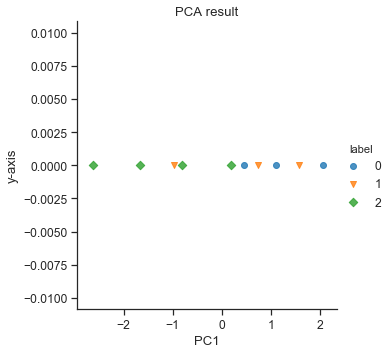

In [197]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, markers=["o", "v","D"], hue="label") 
plt.title('PCA result')

### Two Principal Component

In [184]:
for ev in eig_vectors:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [185]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]

In [186]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [187]:
for i in eig_pairs:   #sorting eigenvalues in decreasing manner
    print(i[0])

2.212522910508318
1.715578146696657
1.01122039886449
0.4245279895834576
0.19170610990263418


We are reducing a 5-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [188]:
matrix_w= np.hstack((eig_pairs[0][1].reshape(5,1), eig_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.518 -0.351]
 [-0.149 -0.736]
 [-0.378  0.145]
 [-0.428  0.561]
 [ 0.618  0.005]]


In [189]:
Y_pca= x_std.dot(matrix_w)
Y_pca

array([[ 2.048,  0.83 ],
       [-0.97 ,  0.689],
       [-0.802, -1.964],
       [ 1.096,  1.922],
       [ 0.192, -2.241],
       [ 0.445, -0.089],
       [ 1.564, -0.405],
       [-1.675,  0.994],
       [ 0.73 , -0.372],
       [-2.629,  0.637]])

In [190]:
result = pd.DataFrame(Y_pca, columns=['PC1','PC2'])
result['label'] = Data["BodyType"]
result

,PC1,PC2,label
0,2.047857,0.829606,skinny
1,-0.969615,0.688577,Normal
2,-0.801946,-1.964434,Fat
3,1.096483,1.921841,skinny
4,0.191894,-2.240905,Fat
5,0.445446,-0.089477,skinny
6,1.564242,-0.404559,Normal
7,-1.674824,0.993950,Fat
8,0.729843,-0.371712,Normal
9,-2.629380,0.637113,Fat


Text(0.5, 1.0, 'PCA result')

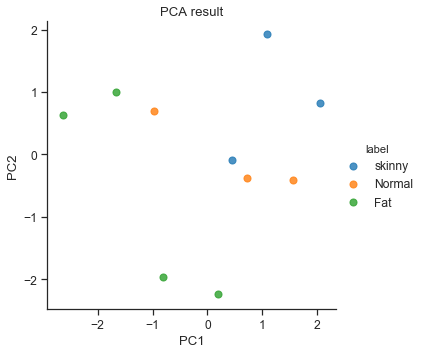

In [191]:
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False, scatter_kws={"s": 50}, hue="label") 
plt.title('PCA result')

For more info on how PCA works: 

https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

https://builtin.com/data-science/step-step-explanation-principal-component-analysis
